# Compiling and Submitting Circuits onto Sqorpius via Qiskit


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Infleqtion/client-superstaq/blob/main/docs/source/optimizations/sqorpius/sqorpius_compile_qss.ipynb) [![Launch Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Infleqtion/client-superstaq/HEAD?labpath=docs/source/optimizations/sqorpius/sqorpius_compile_qss.ipynb)

## Import Requirements

This tutorial will showcase how to compile and submit a circuit onto Infleqtion's hardware, Sqorpius, using the ```qiskit-superstaq``` client.

In [1]:
# Required imports
try:
    import qiskit
    import qiskit_superstaq as qss
except ImportError:
    print("Installing qiskit-superstaq...")
    %pip install --quiet 'qiskit-superstaq[examples]'
    print("Installed qiskit-superstaq.")
    print("You may need to restart the kernel to import newly installed packages.")
    import qiskit
    import qiskit_superstaq as qss

# Optional imports
import os  # Used if setting a token as an environment variable

To interface Superstaq via Qiskit, we must first instantiate a service provider in ```qiskit-superstaq```. We then supply a Superstaq API key (which you can get from https://superstaq.infleqtion.com) by either providing the API key as an argument, i.e., ```qss.superstaq_provider.SuperstaqProvider(api_key="token")```, or by setting it as an environment variable (see more details [here](https://superstaq.readthedocs.io/en/latest/get_started/basics/basics_qss.html#Set-up-access-to-Superstaq%E2%80%99s-API)).

In [2]:
provider = qss.SuperstaqProvider()

## Create a Circuit

First, we will create an example Qiskit circuit that we can then compile and submit onto Sqorpius

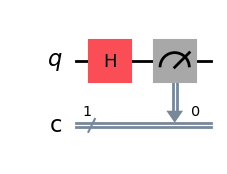

In [ ]:
circuit1 = qiskit.QuantumCircuit(1, 1)
circuit1.h(0)
circuit1.measure(0, 0)
circuit1.draw(output="mpl", fold=-1)

## Single Circuit Compilation

We will now compile the above circuit onto Sqorpius's native gateset and visualize the differences by drawing the compiled circuit

In [4]:
compiler_output = provider.cq_compile(circuit1)

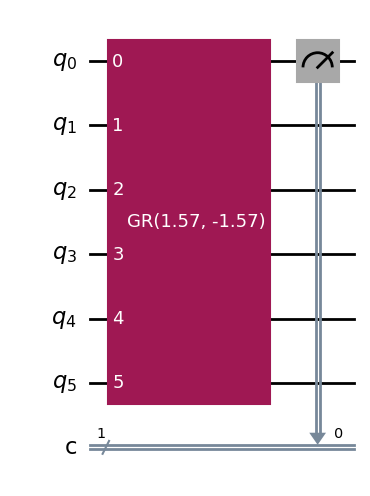

In [5]:
compiler_output.circuit.draw("mpl")

If you would like to compile (or submit) on a different number of qubits, this can be done via the ```grid_shape``` option. This simply sets the shape of the rectangular qubit grid. However, specifying a grid that is incompatible with Sqorpius's current capabilities will result in an error when submitting.

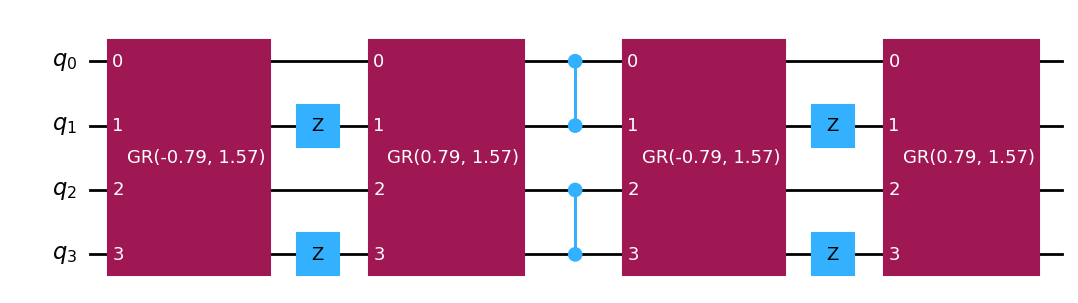

In [6]:
example_circuit = qiskit.QuantumCircuit(4, 1)
example_circuit.cx(0, 1)
example_circuit.cx(2, 3)
new_compiler_output = provider.cq_compile(example_circuit, grid_shape=(2, 2))
new_compiler_output.circuit.draw(output="mpl", fold=-1)

## Single Circuit Submission

The code below will submitt he circuit to the noiseless Sqorpius simulator. If you would like to run on Sqorpius, change the ```target``` argument in backend from ```cq_sqorpius_simulator``` to ```cq_sqorpius_qpu```. It is recommended to first submit to the simulator for testing to ensure your code runs before submitting to Sqorpius. 

In [7]:
backend = provider.get_backend("cq_sqorpius_simulator")
job = backend.run(circuit1, shots=100)
print(f"Counts from qiskit-superstaq submission: {job.result().get_counts()}")

Counts from qiskit-superstaq submission: {'1': 47, '0': 53}


If you would like to submit these circuits to a noisy simulator, you can specify via ```method = noise-sim``` in ```job```.

In [8]:
backend = provider.get_backend("cq_sqorpius_simulator")
job = backend.run(circuit1, shots=100, method="noise-sim")
print(f"Counts from noisy qiskit-superstaq submission: {job.result().get_counts()}")

Counts from noisy qiskit-superstaq submission: {'0': 49, '1': 51}


## Multiple circuit compilation

All the functionalities we have seen so far can also be used on a multiple-circuit input as well. To illustrate this, let us create a different example two-qubit circuit, and compile both circuits we have created at the same time. 

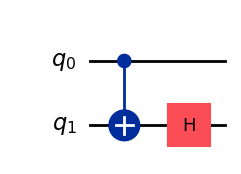

In [9]:
circuit2 = qiskit.QuantumCircuit(2)
circuit2.cx(0, 1)
circuit2.h(1)
circuit2.draw(output="mpl", fold=-1)

In [10]:
compiler_output = provider.cq_compile([circuit1, circuit2])

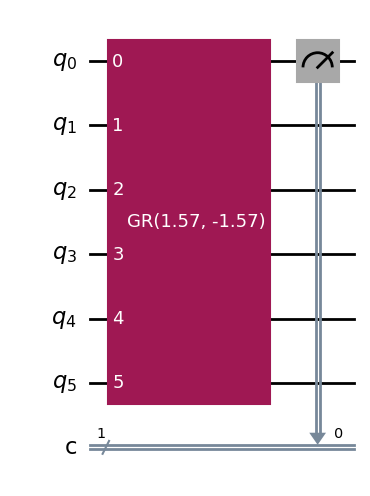

In [11]:
compiler_output.circuits[0].draw("mpl")

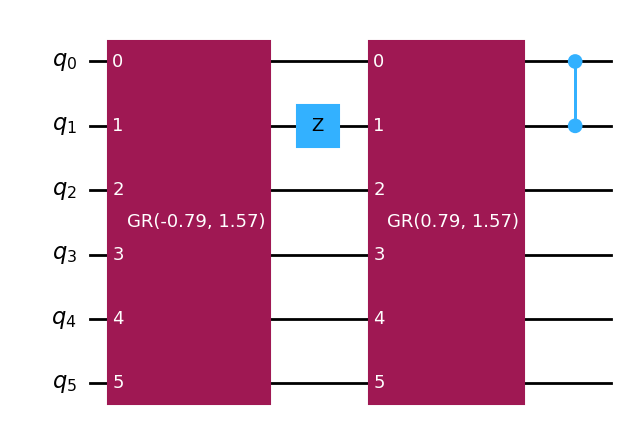

In [12]:
compiler_output.circuits[1].draw("mpl")